In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 1) First Class, how to read a data file into pandas?

In [14]:
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [20]:
use_cols = ['user_ic','age','gender','occupation','zip_code']
users = pd.read_table('http://bit.ly/movieusers',sep = '|', header = None, names = use_cols)
users.head()

,user_ic,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


# 2) Class two, how to select a pandas series from a DataFrame?

In [22]:
ufo = pd.read_csv("http://bit.ly/uforeports")

In [23]:
type(ufo) #This shows us the type of object that is the file ufo. As we expected, it's a DataFrame type. 

pandas.core.frame.DataFrame

In [24]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [27]:
ufo['City']; #We select a serie by using bracket notation. 
type(ufo['City']) # With type() we check that the type of object we select is a serie, indeed.

pandas.core.series.Series

In [30]:
ufo.City; # We can select a serie by using dot notation as well. 
type(ufo.City)

pandas.core.series.Series

In [38]:
# How to create a new serie from the original DataFrame? We use the same technique as strings, we use plus sign.
ufo.City+ufo.State; # This put the City just next to the Sate, and this is not helfpul at all. We can fix it.
ufo['City']+ufo['State']; # This produces the same result.

In [40]:
ufo.City+', '+ufo.State; #By adding a comma between the series, we orgnize the serie in a better way.
ufo['City']+', '+ufo['State']; # This produces the same resulting serie as the previous line.

In [35]:
# If we want to create a new column with the previous serie, the resulting of adding two series, 
# We have to use bracket notation.
ufo['Location'] = ufo.City+', '+ufo.State

In [36]:
ufo.head() # We can see here the last column added is a combination of two series, Location.

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


# 3) Third class, why some commands end with parenthesis, and others don't?

In [2]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [3]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [4]:
movies.describe() #Describes shows you a description of the statistics of all numerical columns. 

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [5]:
movies.shape

(979, 6)

In [6]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

**The resons for which some expressions have parenthesis and others don't are that the DataFrame type has methods
and attributes. The methods are like actions, tasks made by the Data Frame. For instance, df.head() means "please, return the head", and df.describe() means "please, compute the statistics". Now, the attributes are characteristics of the Data Frame. For instance, df.shape means "characteristic of shape is:", the same idea with df.dtype.**

In [7]:
movies.describe(include='object')

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,True Grit,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


# Cheking arguments of a method.
If you want to review the arguments of a method, you have to hit shift+tab.
* one time and it shows a brief list with the arguments or parameters.
* twice and it shows a bigger window with more information.
* three times and the window satays longer.
* four times and the window gets bigger and it covers half of the browser. 

#  4) Fourth classe, How to rename the columns of a Data Frame?

In [30]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [31]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [11]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

**Let's suppose that we want to rename the column "Shape Reported" and "Colors Reported", how do i do that?**

In [14]:
ufo.rename(columns = {'Colors Reported':'Colors_Reported','Shape Reported':'Shape_Reported'},inplace=True)

If we want to rename a column we have to use the .rename() method, we pass the parameters as columns = {'old name':'new name'}
and the parameter inplace = True, so we make the change very there. 

In [15]:
ufo.columns #Notice that the names of two columns changed. 

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

**Is there another way of renaming the columns of a Data Frame? What if I want to replace all these column names?**
* Create a list with new column names, for instance, new_cols=['name1','name2','name3','name4','name5']
* Then we just pass the list of names to the attribute df.columns = new_cols.
* This overwrite the name of the columns automatially. 

In [17]:
new_name_cols = ['city','colors reported','shape reported','state','time']

In [18]:
ufo.columns = new_name_cols

In [20]:
ufo.columns # Notice that now all the name columns are written in lower case. 

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

**Is there another way? Yes, there's a third way of renaming the columns.**
* We just pass the list of the new names as argument of the pd...read_csv() method. 

In [32]:
spanish_cols = ['ciudad','color reportado','forma reportada','provincia','hora']
ufo = pd.read_csv('http://bit.ly/uforeports',names = spanish_cols, header=0)

In [33]:
ufo.head()

,ciudad,color reportado,forma reportada,provincia,hora
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


# What happens if I have hundreds of columns and I want the spaces with underscores?

We can use a string method for the attribute columns.

In [34]:
ufo.columns = ufo.columns.str.replace(' ','_')

In [35]:
ufo.head()

,ciudad,color_reportado,forma_reportada,provincia,hora
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


# 5) Fifth class, how to remove columns?

In [40]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [41]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [42]:
ufo.drop('Colors Reported',axis=1, inplace=True) #this is only for just one column. 

In [43]:
ufo.head()

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


In [44]:
ufo.drop(['City','State'],axis=1,inplace=True)

In [45]:
ufo.head()

,Shape Reported,Time
0,TRIANGLE,6/1/1930 22:00
1,OTHER,6/30/1930 20:00
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00


In [53]:
ufo.drop([1,2,3,4,5],axis=0,inplace=True)

In [54]:
ufo.head()

,Shape Reported,Time
6,CIRCLE,6/15/1935 0:00
7,DISK,7/15/1936 0:00
8,CIGAR,10/15/1936 17:00
9,CYLINDER,6/15/1937 0:00
10,LIGHT,8/15/1937 21:00


# 6) Sixth class, How do I sort a DataFrame or a Series?

In [3]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [5]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [4]:
movies.title.sort_values().head()

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
Name: title, dtype: object

In [7]:
 movies.sort_values('star_rating',ascending = False).head(8)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."


In [8]:
movies.sort_values(['star_rating','duration']).head(8)

,star_rating,title,content_rating,genre,duration,actors_list
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
948,7.4,Frances Ha,R,Comedy,86,"[u'Greta Gerwig', u'Mickey Sumner', u'Adam Dri..."
966,7.4,The Simpsons Movie,PG-13,Animation,87,"[u'Dan Castellaneta', u'Julie Kavner', u'Nancy..."
947,7.4,Eraserhead,UNRATED,Drama,89,"[u'Jack Nance', u'Charlotte Stewart', u'Allen ..."
971,7.4,Death at a Funeral,R,Comedy,90,"[u'Matthew Macfadyen', u'Peter Dinklage', u'Ew..."
933,7.4,Beetlejuice,PG,Comedy,92,"[u'Alec Baldwin', u'Geena Davis', u'Michael Ke..."
942,7.4,Raising Arizona,PG-13,Comedy,94,"[u'Nicolas Cage', u'Holly Hunter', u'Trey Wils..."
959,7.4,Deconstructing Harry,R,Comedy,96,"[u'Woody Allen', u'Judy Davis', u'Julia Louis-..."


# 7) How do I filter rows of a DataFrame by column value?

In [10]:
movies = pd.read_csv('http://bit.ly/imdbratings') #Dataset of top rated movies. 

In [11]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [12]:
movies.shape

(979, 6)

**Let's pretend that we want to only examine movies that are really long, maybe ones that are at least 200 minutes long. In other words, we want to filter this DataFrame, so that we see all the columns, but we only see the rows in which that row has a duration of at least 200 minutes.**

In [13]:
two_hundred_minutes = movies['duration'] >= 200 #We set a boolean serie in which the value is True when the duration is greater than 200.

In [14]:
movies[two_hundred_minutes] #We pass the boolean serie to the original DataFrame and we get the filtered DataFrame.

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [15]:
movies[movies['duration'] >= 200] # this is the other way of filtering by volumn value. We just pass the condition to the DataFrame. 

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


Due to the fact that we have a DataFrame filtered by column value, we can use any method fom DataFrames.
For instance, .sort_values() or .head() or any other method. The type of the result is a DataFrame. 

In [25]:
movies[movies['duration'] >= 200].sort_values(by='duration',ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
767,7.6,"It's a Mad, Mad, Mad, Mad World",APPROVED,Action,205,"[u'Spencer Tracy', u'Milton Berle', u'Ethel Me..."
630,7.7,Malcolm X,PG-13,Biography,202,"[u'Denzel Washington', u'Angela Bassett', u'De..."


We can also select a specific column from the previous DataFrame, for instance, 'genre'.

In [26]:
movies[movies['duration'] >= 200].genre; #This is with dot notation.
movies[movies['duration'] >= 200]['genre'] #This is with bracket notation. 
# Both lines produce the same Serie, filtered by lenght and only the column genre. 

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

There's another way of doing the same task, this is by using the .loc[] method for DataFrames.

In [28]:
movies.loc[movies['duration'] >= 200, ['genre','title']] # The method .loc[] is very powerful in this case. 

,genre,title
2,Crime,The Godfather: Part II
7,Adventure,The Lord of the Rings: The Return of the King
17,Drama,Seven Samurai
78,Crime,Once Upon a Time in America
85,Adventure,Lawrence of Arabia
142,Adventure,Lagaan: Once Upon a Time in India
157,Drama,Gone with the Wind
204,Adventure,Ben-Hur
445,Adventure,The Ten Commandments
476,Drama,Hamlet


# 8) How do I apply multiple filter criteria to a DataFrame?

In [29]:
movies[(movies['duration']>=200) & (movies['genre']=='Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


If we want to slect rows by multiple values of a certain column, we can use the boolean operator "or" '|'

In [32]:
movies[(movies.genre=='Crime')|(movies.genre=='Drama')|(movies.genre=='Action')].head() 
#This way of filtering DataFrame by multiple column values is used with |, or, in which
# if one of the statements is True, then the result is True. 

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


**How do we simplify that line quite wordy? We need to use the series method .isin()**

In [43]:
movies[movies['genre'].isin(['Crime','Drama','Action'])].head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


# 9) Questions ans Answers.

How do we select certain columns from a DataFrame and ignore the others?
We just use the parameter usecols=[list of columns] in the read_csv method. 

In [58]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [47]:
ufo = pd.read_csv('http://bit.ly/uforeports',usecols = ['City','State'])
ufo.columns

Index(['City', 'State'], dtype='object')

How do we iterate on a DataFrame using the for loop?

In [51]:
ufo = pd.read_csv('http://bit.ly/uforeports',nrows=5, usecols = ['City','State'])
ufo

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [53]:
for c in ufo.City:
    print(c)

Ithaca
Willingboro
Holyoke
Abilene
New York Worlds Fair


In [55]:
for index, row in ufo.iterrows():
    print(index, row.City, row.State)

0 Ithaca NY
1 Willingboro NJ
2 Holyoke CO
3 Abilene KS
4 New York Worlds Fair NY


In [60]:
ufo.describe(include = 'object')

,City,Colors Reported,Shape Reported,State,Time
count,18216,2882,15597,18241,18241
unique,6476,27,27,52,16145
top,Seattle,RED,LIGHT,CA,11/16/1999 19:00
freq,187,780,2803,2529,27


What is the best way to drop every non-numeric column from a DataFrame?

In [63]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [64]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [68]:
import numpy as np
drinks.select_dtypes(include=[np.number]).head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9


In [73]:
drinks.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [76]:
# Just a practice of how we can filter the DataFrame by rows and column value.
drinks.loc[drinks['continent'].isin(['South America','Africa','Asia']),['beer_servings','wine_servings','continent']].head()

,beer_servings,wine_servings,continent
0,0,0,Asia
2,25,14,Africa
4,217,45,Africa
6,193,221,South America
12,42,7,Asia


In [79]:
drinks.describe(include = 'all')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
count,193,193.000000,193.000000,193.000000,193.000000,193
unique,193,NaN,NaN,NaN,NaN,6
top,Bhutan,NaN,NaN,NaN,NaN,Africa
freq,1,NaN,NaN,NaN,NaN,53
mean,NaN,106.160622,80.994819,49.450777,4.717098,NaN
std,NaN,101.143103,88.284312,79.697598,3.773298,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,20.000000,4.000000,1.000000,1.300000,NaN
50%,NaN,76.000000,56.000000,8.000000,4.200000,NaN
75%,NaN,188.000000,128.000000,59.000000,7.200000,NaN


# 10) How do I use the 'axis' parameter in pandas?

In [10]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

**The axis=1 refers to columns, and axis=0 refers to rows.**

In [11]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


**Let's say that we want to remove a column, we want to remove the continent column, what should I do?**

In [12]:
drinks.drop(['continent'], axis = 1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [15]:
drinks.mean(axis=0) #This gives us the mean of all the numerical values. 

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [19]:
drinks.mean(axis=1).head(10)

0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
5     69.975
6    111.825
7     53.700
8    138.850
9    138.675
dtype: float64

notice two things: axis=0 moves along all the columns, but uses al the rows.
axis=1 moves along the horizontal axis, using one row at time. 
We can use another expression for each axis:
axis = 0 is equivalent to axis = 'index'
axis = 1 is equivalent to axis = 'columns'

Another note regarding the previous topic, we can think this:<br />
axis = 0 = 'index' as an instructions to move along the vertical axis, from up to down.<br />
axis = 1 = 'columns' as an instruction to move along the horizontal axis, from left to right, or just in one column. 

# 11) How do we use string methods in pandas?

 There's a way of dealing with strings in a DataFrame. If one column has string objects, we can write a function for one single string and then use the method .apply(function) or .apply(lamdbda x: x whatever)

In [80]:
orders = pd.read_table('http://bit.ly/chiporders')

In [81]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


**What if we want to make the item_name uppercase, how do we do that?**

In [69]:
orders['item_name'] = orders['item_name'].apply(lambda x: x.upper())

In [ ]:
orders['item_name'] = orders['item_name'].str.upper()

**What other method can we use? We can use the string method .contains()**

In [82]:
orders.item_name.str.contains('Chicken').head() #Notice that this reutrns a Boolean serie, so we can use it in order to filter the DataFrame.

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [85]:
orders[orders.item_name.str.contains('Chicken')].head() #We have filtered the DataFrame with the string method .contains()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25


**How do we remove the brackets from texts in a column of a DataFrame?**

In [91]:
orders['choice_description'] = orders.choice_description.str.replace('[','').str.replace(']','');

In [92]:
orders.head() # We have here the items in 'choice_description' without brackets. 

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,Clementine,$3.39
2,1,1,Nantucket Nectar,Apple,$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",$16.98


In [94]:
orders['choice_description'] = orders['choice_description'].str.replace('[\[\]]','') # This line perform the same task, but in one single line. 

# 12) how do I change the type of a Series?

In [95]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [97]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [99]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

**Let's suppose that we want to convert the beer_servings to float64, how do we convert it from int64 to float64?**

In [104]:
drinks['beer_servings'] = drinks.beer_servings.astype(float) # we need to overwrite the column if we want to change the type of the column.

In [105]:
drinks.drop(columns=['beer_serving'],axis=1,inplace=True)

In [106]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [107]:
orders = pd.read_table('http://bit.ly/chiporders')

In [108]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [110]:
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

**How do remove the money symbol and conver the number into a float?**
- we use the string method .replace() and then we conver the string to a float.

In [111]:
orders['item_price'] = orders['item_price'].str.replace('$','')

In [112]:
orders['item_price'] = orders['item_price'].astype(float)

In [113]:
orders.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [114]:
orders.item_name.str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int32

# 13) How should we use groupby in pandas?

In [3]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [4]:
drinks.head() # Notice that there're two cathegorical columns, one country the other continent.

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


**Let's suppose that we want to know what is the average of beer servings across all countries?**<br />
**We can use the method .mean() for that column, drinks.beer_serving.mean().** 

In [7]:
drinks.beer_servings.mean() # We can see that the across the entire DataSet the average beer servings is the next:

106.16062176165804

**What if we want to know the average beer servings by continent?**<br />
**In this case we use groupby over the column "continent"**

In [8]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [16]:
drinks.groupby('continent').mean().sort_values(by = 'beer_servings', ascending = False)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Europe,193.777778,132.555556,142.222222,8.617778
South America,175.083333,114.750000,62.416667,6.308333
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455


In [19]:
drinks[drinks.continent == "Europe"].beer_servings.mean()
#The first part is a DataFrame with the labels of "Europe", the next thing is the column "beer_servings", and finally we apply the mean().

193.77777777777777

In [13]:
drinks.groupby(['continent']).country.count() # We can get a serie with the number of countries in each continent.

continent
Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: country, dtype: int64

**Another example with the aggregation .max() that will show the max value of beer servings for each continent.**

In [21]:
drinks.groupby('continent').beer_servings.max().sort_values(ascending=False)

continent
Africa           376
Europe           361
South America    333
Oceania          306
North America    285
Asia             247
Name: beer_servings, dtype: int64

In [23]:
drinks[drinks.continent == 'Oceania'].beer_servings.max()

306

**We can look at the min() as well**

In [27]:
drinks.groupby('continent').beer_servings.min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

In [25]:
south_america = drinks['continent'] == 'South America'
drinks[south_america].beer_servings.min()

93

**There's a function called agg, .agg(), that allows us to specify multiple operators.**

In [32]:
drinks.groupby('continent').beer_servings.agg(['count','min','max','mean'])
#The number 'count' stands for the number of records in the DataFrame for each continent.

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [33]:
%matplotlib inline

**We can make a plot with the groupby and check the how the statistics of the cathegories are related**

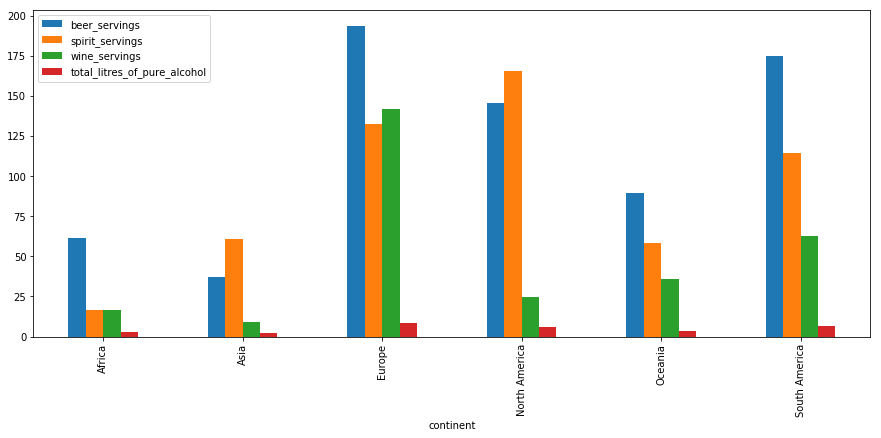

In [39]:
drinks.groupby('continent').mean().plot(figsize = (15,6),kind = 'bar')

# 14) How do we explore a pandas Series?

In [2]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [4]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [7]:
movies.dtypes #Let's check the types of data of each column.

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [12]:
#The first thing you might do with a non-numerical column, like genre, is to describe it. 
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [ ]:
movies.genre.value_counts() #This shows us a count of each value in how often it appears in this series. 

In [47]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [49]:
movies.genre.value_counts(normalize = True) # This parameter "normalize" gives us the percent of each value in that series.

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Sci-Fi       0.005107
Thriller     0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

# One important thing, *the value counts gives us a series*, therefore we can use any series method, this is, .head(), .str for strings, etc. This is really important because we can deal with the result as any other series.

In [15]:
movies.genre.value_counts().head()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Name: genre, dtype: int64

In [16]:
movies.genre.unique() # This method gives us a list with all the different values in one column.

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [17]:
# How to we check the number of values in one column?
movies.genre.nunique() # This method gives us the number of different values in one column. 

16

In [23]:
movies.content_rating.unique()

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', nan, 'TV-MA', 'GP', 'NC-17'], dtype=object)

In [24]:
pd.crosstab(movies.genre,movies.content_rating) #This allows use to see a matrix with the combination of genre and content rating.
#For instance, There are 44 actions movies rated as PG-13.

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


**Let's describe a numerical column, like duration**

In [19]:
movies.duration.describe() # We use the describre for a numerical column.

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [20]:
movies.duration.mean() # We can use any series method.

120.97957099080695

In [36]:
movies.duration.value_counts().head(20) #This shows us the number of movies with a certain duration.
#For instance, there're 23 movies with a lenght, duration, of 112min.

112    23
113    22
102    20
101    20
129    19
120    18
105    18
126    18
98     18
130    18
100    17
121    17
116    17
124    16
122    16
118    16
115    16
96     16
104    16
110    16
Name: duration, dtype: int64

In [30]:
%matplotlib inline

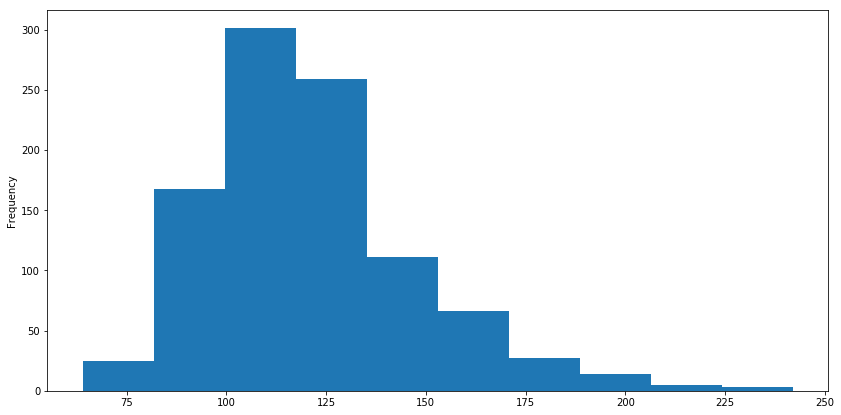

In [35]:
movies.duration.plot(figsize = (14,7), kind='hist') #This shows us a histogram of the durations of the movies.
# X-axis is the duration of the movie, and Y-axis the number of movies with that length. 

In [66]:
# In this line we check that the number of movies between 100 and 117 aprox. is 300. This matches with the histogram.
number_movies_100_120 = (movies.duration>=100) & (movies.duration<=117)
movies[number_movies_100_120].duration.count()

301

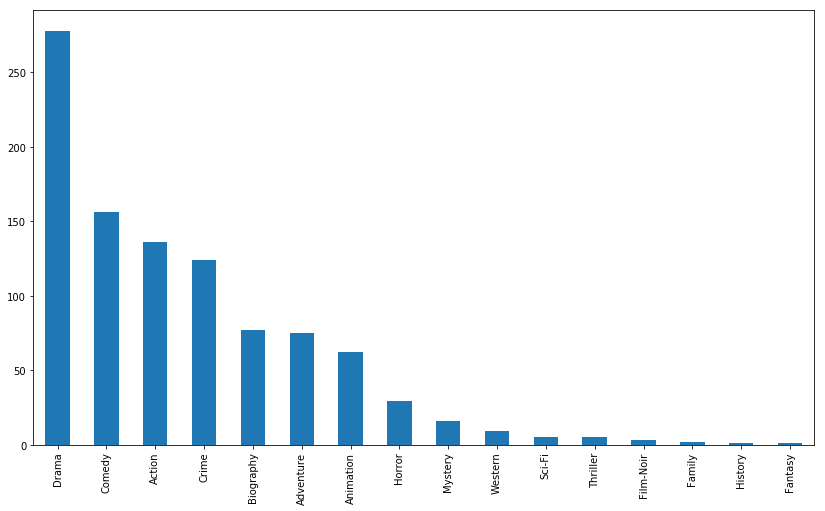

In [58]:
# we can make a bar plot with the number of movies of each genre.
movies.genre.value_counts().plot(figsize = (14,8), kind = 'bar')

In [65]:
drama = movies.genre == "Drama"
movies[drama].genre.count()
# With this line we check that the frecuency of the genre "Drama" is 278, as the bar plot displays. 

278

# 15) How do I handle missing values?

In [34]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [4]:
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


**The tail has some NaN, Not a Number. This means that there's a missing value in the original DataSet, and Pandas labels it as NaN.**

In [4]:
ufo.isnull().tail()
# Notice that this command returns a DataFrame with Trues and Falses, True is that there's a missing value, and False
# is that there's not missing value.

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


**How do We know that total number of missing values for each column?**<br>
**We can use .isnull() and the series method .sum()**

In [8]:
ufo.isnull().sum().sort_values(ascending = True) # This exploratory tool is very useful at the beginning of the EDA.

State                  0
Time                   0
City                  25
Shape Reported      2644
Colors Reported    15359
dtype: int64

**Notice that the method .isnull() returns a boolean series. Therefore we can use it as a condition with bracket notation in order to filter the DataFrame. The example is as follows**

In [6]:
ufo[ufo.City.isnull()] #Notice the number of records in the column City with NaN values. 
# the NaN's in column City is 25, which we can check in the previous line. 

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


**Once we know that there're missing values, what should we do about the missing values?**<br>
**There're several options in order to deal with the missing values. The righ choice depends on the situation.**<br />
**Let's check a some ways**

**a) Drop any missing value in the DataFrame, from all the columns**

In [12]:
ufo.shape

(18241, 5)

In [13]:
ufo.dropna(how='any').shape # The expresion "any" tells that we drop the row if "any" value is NaN. If the row has at least 1 NaN, then it's dropped. 
# in this case we drop 2486 rows. They have at least 1 NaN. 

(2486, 5)

In [15]:
ufo.dropna(how = 'all').shape #This means that we only drop a row if all the features are NaN. That's why we don't drop any row. 

(18241, 5)

In [20]:
ufo.dropna(subset = ['City','Shape Reported'], how = 'all').shape 
# The condition 'all' stands for an 'and, &', and the condition 'any' stands for an 'or, |'
# The shape gives us the rows we will have after dropping the rows with NaN. 

(18237, 5)

**b) The second option is to fill the NaN's with a certain value, it could be the mean, the mode, another value from the column, etc.**

In [37]:
ufo['Shape Reported'].value_counts(dropna = False).head(12)
# The parameter 'dropna = False' tells to pandas to include the NaN's in the list of values. 

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
Name: Shape Reported, dtype: int64

In [38]:
ufo['Shape Reported'].fillna(value = 'VARIOUS', inplace = True)
# With this we replace the NaN values of the column ['Shape Reported'] by the value 'VARIOUS', which is reasonable. 

In [39]:
ufo['Shape Reported'].value_counts(dropna = False).head(12)
#Notice that now there're not NaN's and the value 'VARIOUS'

VARIOUS      2977
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
RECTANGLE     303
Name: Shape Reported, dtype: int64

# 16) What do we need to know about pandas index?

**What are the advantages of using indices instead of storing the values in columns?**

In [36]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [3]:
drinks.head()
# Each row represents a country in some data in that row.
# LEt's focus on the index.

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
drinks.index #This command gives us information about the indices of the DataFrame. 

RangeIndex(start=0, stop=193, step=1)

In [5]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

**The indices and the columns are not considered part of the content of the DataFrame**

In [8]:
pd.read_table('http://bit.ly/movieusers',header=None,sep='|',names = ['indices','age','gender','profession','id']).head()

,indices,age,gender,profession,id
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [10]:
drinks[drinks.continent == 'South America']
#Notice that the indices are the original row number of the original DataFrame.  
# This is a manner of identification about what rows you are working with, even if you filter the DataFRame.

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America
52,Ecuador,162,74,3,4.2,South America
72,Guyana,93,302,1,7.1,South America
132,Paraguay,213,117,74,7.3,South America
133,Peru,163,160,21,6.1,South America
163,Suriname,128,178,7,5.6,South America


**What if I want to grab a piece of the DataFrame?**

In [12]:
drinks.loc[23, 'beer_servings']
# We can see that the index is a manner of dealing with the position of the rows. 

245

**How can we set a different index?**<br>
**This is the reason why the DataFrame has index, and it's not given only with columns.**

In [37]:
drinks.set_index('country',inplace=True)
#The method .set_index sets the index in according to one column. If you check the columns, the old "country" column won't appear in the list

In [38]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [25]:
drinks.columns
# As we expected, the column 'country' doesn't appear.

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [27]:
drinks.index
# Now the countries are the indices of the DataFrame. 

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [28]:
drinks.shape
#Notice how the number of columbs diminished by one, due to the change of the 'country' as index.

(193, 5)

In [29]:
drinks.loc['Brazil','beer_servings']
# We can access to the same information with the new index. 

245

**What if I want to use the default index and use again the 'country' as a column? How do I do that?**

In [39]:
drinks.reset_index(inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [44]:
drinks.describe()
# Notice that the describe is a DataFrame, so we can use any DataFrame method for this one. 
# in particular, we can use the .loc[] method in order to get a particular value of the DataFrame. 

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [42]:
drinks.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [43]:
drinks.describe().columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [45]:
drinks.describe().loc['25%','beer_servings']
# Notice how we used a DataFrame method in the describe() result. 

20.0

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [14]:
drinks.continent.head()
#The index are the ones given by default. 0,1,2,3..and o son. But we can set the index with the method set_index. 

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: object

**Let's say that we want the column 'continent' to be the index**

In [37]:
drinks.set_index('country',inplace=True)

In [17]:
drinks.continent.head()
# Notice that this time we have the countries as index. The index is on the left, and the values are on the right. 

country
Afghanistan      Asia
Albania        Europe
Algeria        Africa
Andorra        Europe
Angola         Africa
Name: continent, dtype: object

In [22]:
drinks.continent.value_counts()
# Notice that the method .value_counts() returns a Series, therefore we can treat it as any other Series.
# The serie has index and values.

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [23]:
# We can acces to the value of each index by using bracket notation.
drinks.continent.value_counts()['Africa']

53

**How can we sort the values of a Serie?**

In [26]:
drinks.continent.value_counts().sort_values(ascending=False)
#Notice that we have sorted the series by values, but we can sort the serie by index.

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [27]:
drinks.continent.value_counts().sort_index()
#In this case, the serie is ordered by index, alphabetically order.

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [38]:
people = pd.Series([3000000,850000], index=['Albania','Andorra'], name = 'population')
people

Albania    3000000
Andorra     850000
Name: population, dtype: int64

**Let's suppose that we want use this Serie plus the drinks dataset to calculator the total beer servings for each country, and we do that by multiplying the values of the small dataset, the number of people, times the data in the beer serving series, which tells us the average  per person. So we take the average per person, multiply by the number of people, to see the total beer serving per year in that country.**

In [33]:
drinks.beer_servings*people
#Notice that we just multiplied two Series and they multiply index by index. If the index matches, then it shows a result,
# Otherwise, it displays a result. 

Afghanistan                     NaN
Albania                 267000000.0
Algeria                         NaN
Andorra                 208250000.0
Angola                          NaN
Antigua & Barbuda               NaN
Argentina                       NaN
Armenia                         NaN
Australia                       NaN
Austria                         NaN
Azerbaijan                      NaN
Bahamas                         NaN
Bahrain                         NaN
Bangladesh                      NaN
Barbados                        NaN
Belarus                         NaN
Belgium                         NaN
Belize                          NaN
Benin                           NaN
Bhutan                          NaN
Bolivia                         NaN
Bosnia-Herzegovina              NaN
Botswana                        NaN
Brazil                          NaN
Brunei                          NaN
Bulgaria                        NaN
Burkina Faso                    NaN
Burundi                     

In [40]:
pd.concat([drinks,people],axis=1).head()
# We can concat two dataframes even if they don't have the same dimention.

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,population
Afghanistan,0,0,0,0.0,Asia,NaN
Albania,89,132,54,4.9,Europe,3000000.0
Algeria,25,0,14,0.7,Africa,NaN
Andorra,245,138,312,12.4,Europe,850000.0
Angola,217,57,45,5.9,Africa,NaN


# 17) How do I select multiple rows and columns from a DataFrame?
**In Particular, what is the difference between loc, iloc and ix?**

In [2]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [3]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [5]:
# ufo.loc[what rows i want, what columns i want]
ufo.loc[0,:] # row 0, all columns.

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [10]:
ufo.loc[:2,:] # Explicit is better than implicit. 
#this is when we select the labels by numbers.
#Notice that the notation 0:2 is inclusive in the extremes, this is, row 0 and row 2 are included in the resulting DataFrame.

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


**How about columns selection?**

In [21]:
ufo.loc[:,'City'].head()
#Notice that we selected all the rows ' : ' and only the column 'City'.

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object

In [20]:
ufo.loc[:,['City','State']].head()
#If we want to select multiple columns, we just put them in a list. 

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [24]:
ufo.loc[:,'City':'State'].head()
# The colon notation stands for the range between those values, between 'City' and 'State'
# So the dataframe will display 

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY


In [29]:
ufo.head().drop('Time',axis=1)
#Recall that we can use any datamframe method. 

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY


**How we can select rows with a certain specific value? For instance the rows with value 'Oakland'?**<br>
**We need to pass the condition for the column with that value.**

In [35]:
ufo[ufo.City == 'Oakland'].State

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

In [34]:
# We can get the same result with .loc[]
ufo.loc[ufo.City ==  'Oakland', :]
#This is more explicit that the other line. 

,City,Colors Reported,Shape Reported,State,Time
1694,Oakland,NaN,CIGAR,CA,7/21/1968 14:00
2144,Oakland,NaN,DISK,CA,8/19/1971 0:00
4686,Oakland,NaN,LIGHT,MD,6/1/1982 0:00
7293,Oakland,NaN,LIGHT,CA,3/28/1994 17:00
8488,Oakland,NaN,NaN,CA,8/10/1995 21:45
8768,Oakland,NaN,NaN,CA,10/10/1995 22:40
10816,Oakland,NaN,LIGHT,OR,10/1/1997 21:30
10948,Oakland,NaN,DISK,CA,11/14/1997 19:55
11045,Oakland,NaN,TRIANGLE,CA,12/10/1997 1:30
12322,Oakland,NaN,FIREBALL,CA,10/9/1998 19:40


**The difference between these two ways of filtering and selection rows and columns is that in the first case it might cause errors, meanwhile in the second case, with .loc[], it will be safer to use.**

# 18) When should I use 'inplace' parameter?

**We have see the 'inplace' parameter many times in these videos.**

**The methods that have the parameter 'inplace'**<br>
- drop('column', inplace, axis)
- dropna(how,inplace)
- rename(columbs{}, inplace)
- sort_values(inplace)
- set_index(inplace)

**There's another way of modifing the DataFrame, we can modify the DF by making an assignment statement, and relating the change to the original DataFrame.** <br>
- ufo = ufo.set_index('time')

# 19) How do we use pandas with scikit-learn to create kaggle submissions?

**As first step we create a DataFrame**

In [36]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**a) We create our feature matrix X, from which our model wil leanr.**

In [38]:
feature_cols = ['Pclass', 'Parch'] 
#These are our features.

In [39]:
X = train.loc[:,feature_cols]

In [41]:
X.shape

(891, 2)

**b) Now we have to create our response factor, also known as target factor, the thing we want to predict**

In [51]:
y = train.Survived
y.shape
#This show us that the serie is 1-dimension.

(891,)

**c) Now we are ready to set our scikit-learn model**

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
test = pd.read_csv('http://bit.ly/kaggletest')

In [54]:
test.head()
#Notice that this DataFrame looks very similar to the previous DataFrame train.
#The only difference is that this one doesn't have the column of 'Survived'.
#This is because we don't know yet the 'Survided', we want to predict it, so this DF lacks from that column- 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
X_new = test.loc[:,feature_cols]
X_new.shape
#We define the features from the test DataFrame in order to use them as base to predict the 'Survided'

(418, 2)

**d) Now we can predict the values for the column 'Survided' from the test DataFrame.**

In [58]:
new_pred_class = logreg.predict(X_new)

**e) Now we create a DataFrame with 'PassengerId' and the 'new_pred_class'.<br>
Notice that we takes the Id from the test DF, and we merge it to the new_pred_class, so the resulting DF has the Id and the predicted values**

In [61]:
pd.DataFrame({'PassengerId':test.PassengerId,'Survived':new_pred_class}).head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


**The dictionaries are not ordered in a particular way, so we need to order the DataFrame with the first column as PassengerId, the way of dealing with this is to set the column as index.**

In [65]:
pd.DataFrame({'PassengerId':test.PassengerId,'Survived':new_pred_class}).set_index('PassengerId').to_csv(r'C:\Users\causa\Desktop\Data Science\Data-School\My practices on the course\survived_prediction.csv')

**f) Now we can save the DataFrame into a csv file. We use the method .to_csv('path of the file').** 

In [66]:
# pd.DataFrame({'PassengerId':test.PassengerId,'Survived':new_pred_class}).set_index('PassengerId').to_csv(r'C:\Users\causa\Desktop\Data Science\Data-School\My practices on the course\survived_prediction.csv')

**We can use the method .to_pickle() in order to save a DataFrame as well, and if we want to read it with Pandas, we juse have to use the method pd.read_pickle(paht)**

In [67]:
train.to_pickle('train.pkl')

In [68]:
pd.read_pickle('train.pkl')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# 20) Questions Answered. 